# Naveen Ranapangu

### Predicting the final score of first innings using Supervised Machine Learning  at the end of 6 overs with machine learning

### Read the Data


In [1]:
# import all the requred libraries
import pandas as pd
import os
import glob
import numpy as np
from itertools import chain
from datetime import datetime
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

from pandas import DataFrame
import seaborn as sns
import scipy.stats as stats
# import warnings to hide the warning messages 
import warnings
warnings.filterwarnings('ignore')


# import required models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [2]:
path = r'/home/ug/Desktop/ipl_csv' # path of the file

all_files = glob.glob(path + "/*.csv")

li = []
# read all the csv files
for filename in all_files:

    df = pd.read_csv(filename, sep='delimiter',index_col=None, header=None)
    # files are saved with match id's, so save the file names as match id's
    # in a new column file_name
    df['file_name'] = os.path.basename(filename)

    li.append(df)
# combine all the csv's as a dataframe   
frame = pd.concat(li, axis=0, ignore_index=True)

In [3]:
# check the shape of dataframe
frame.shape

(217578, 2)

## Data cleaning

In [4]:
# remove the rows which starts with info
frame = frame[~frame[0].astype(str).str.startswith('info')]
# remove the rows which starts with version
frame = frame[~frame[0].astype(str).str.startswith('version')]

In [5]:
# check the shape if the rows are eliminated
frame.shape

(200664, 2)

In [6]:
# giving the column names
frame.columns = ['header','match_id']
# 
frame.head()

,header,match_id
20,"ball,1,0.1,Kings XI Punjab,V Sehwag,Mandeep Si...",733987.csv
21,"ball,1,0.2,Kings XI Punjab,V Sehwag,Mandeep Si...",733987.csv
22,"ball,1,0.3,Kings XI Punjab,V Sehwag,Mandeep Si...",733987.csv
23,"ball,1,0.4,Kings XI Punjab,V Sehwag,Mandeep Si...",733987.csv
24,"ball,1,0.5,Kings XI Punjab,V Sehwag,Mandeep Si...",733987.csv


In [7]:
# split the columns into multipule columns based on , and .
a = frame.header.str.split(",",expand=True,)
b = frame.match_id.str.split(".",expand=True,)

In [8]:
# remove un-necessary columns
a = a.drop(columns = 0)
b = b.drop(columns = 1)
# combine
df = pd.concat([b,a], axis =1)

In [9]:
# giving the column names
names = ['match_id','innings','overs','batting_team','striker','non_striker',
        'bowler','runs_off_bat','extras','wides','noballs','byes','legbyes',
        'penalty','kind_of_wicket','other_wicket_type']

df.columns = names
# check the final df
df.head()

,match_id,innings,overs,batting_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,kind_of_wicket,other_wicket_type
20,733987,1,0.1,Kings XI Punjab,V Sehwag,Mandeep Singh,BW Hilfenhaus,4,0,,,,,,"""""",""""""
21,733987,1,0.2,Kings XI Punjab,V Sehwag,Mandeep Singh,BW Hilfenhaus,2,0,,,,,,"""""",""""""
22,733987,1,0.3,Kings XI Punjab,V Sehwag,Mandeep Singh,BW Hilfenhaus,0,0,,,,,,"""""",""""""
23,733987,1,0.4,Kings XI Punjab,V Sehwag,Mandeep Singh,BW Hilfenhaus,0,1,1,,,,,"""""",""""""
24,733987,1,0.5,Kings XI Punjab,V Sehwag,Mandeep Singh,BW Hilfenhaus,0,1,1,,,,,"""""",""""""


 convert all the object columns to required dtypes

In [10]:
df['match_id'] = df['match_id'].astype(int)

In [11]:
# replace "" with zero
df = df.replace('""',np.nan)

In [12]:
#convert innings to int
df['innings'] = df['innings'].astype(int)

# convert runs and extras to int
df['runs_off_bat'] = df['runs_off_bat'].astype(int)
df['extras'] = df['extras'].astype(int)

# wides,noballs,byes,legbyes and penalty are numberic
# convert object type to numeric
df['wides'] = pd.to_numeric(df['wides'], errors='coerce')
df['noballs'] = pd.to_numeric(df['noballs'], errors='coerce')
df['byes'] = pd.to_numeric(df['byes'], errors='coerce')
df['legbyes'] = pd.to_numeric(df['legbyes'], errors='coerce')
df['penalty'] = pd.to_numeric(df['penalty'], errors='coerce')


In [13]:
df.head()

,match_id,innings,overs,batting_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,kind_of_wicket,other_wicket_type
20,733987,1,0.1,Kings XI Punjab,V Sehwag,Mandeep Singh,BW Hilfenhaus,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,733987,1,0.2,Kings XI Punjab,V Sehwag,Mandeep Singh,BW Hilfenhaus,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,733987,1,0.3,Kings XI Punjab,V Sehwag,Mandeep Singh,BW Hilfenhaus,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,733987,1,0.4,Kings XI Punjab,V Sehwag,Mandeep Singh,BW Hilfenhaus,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN
24,733987,1,0.5,Kings XI Punjab,V Sehwag,Mandeep Singh,BW Hilfenhaus,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN


the year of match happened is present in the text file, lets read the text file and open it

In [14]:
f = open("/home/ug/Desktop/ipl_csv/README.txt", "r")
# open the text file
print(f.read())


All Indian Premier League match data in CSV format

The background
--------------

As an experiment, after being asked by a user of the site, I started
converting the IPL data from YAML into this CSV format. This then expanded
to include international T20s, for both women and men, before, finally,
expanding again to cover all matches we provide.

This particular zip folder contains the CSV data for...
  All Indian Premier League matches
...for which we have data, and is loosely based on the format that Retrosheet
uses for baseball, with some suitable hacks built in.

How you can help
----------------

Providing feedback on the data would be the most helpful. Tell me what you
like and what you don't. Is there anything that is in the YAML data that
you'd like to be included in the CSV? Could something be included in a better
format? General views and comments help, as well as incredibly detailed
feedback. All information is of use to me at this stage. I can only improve
the data if peopl

In [15]:
txt_df = pd.read_csv('/home/ug/Desktop/ipl_csv/README.txt',
                     sep="-", header=None,
                     names=["year", "month", "date","club","ipl",
                           "male",'match_id','teams'])

txt_df.head()

,year,month,date,club,ipl,male,match_id,teams
0,All Indian Premier League match data in CSV fo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,==============================================...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,The background,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"As an experiment, after being asked by a user ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# drop na values
txt_df = txt_df.dropna()

we know that, there are **845** matches held between 2008 to 2021 (from cricsheet)

In [17]:
# lets check the length of the txt_df
len(txt_df.year)

845

In [18]:
txt_df.sort_values('year',inplace = True)

txt_df.head()

,year,month,date,club,ipl,male,match_id,teams
905,2008,04,18,club,IPL,male,335982.0,Royal Challengers Bangalore vs Kolkata Knight...
873,2008,05,11,club,IPL,male,336014.0,Deccan Chargers vs Kolkata Knight Riders
872,2008,05,12,club,IPL,male,336016.0,Kings XI Punjab vs Royal Challengers Bangalore
871,2008,05,13,club,IPL,male,336017.0,Kolkata Knight Riders vs Delhi Daredevils
870,2008,05,14,club,IPL,male,336018.0,Mumbai Indians vs Chennai Super Kings


In [19]:
remove = ['month', 'date', 'club', 'ipl', 'male']

txt_df.drop(columns = remove,axis =1,inplace = True)

txt_df.head()

,year,match_id,teams
905,2008,335982.0,Royal Challengers Bangalore vs Kolkata Knight...
873,2008,336014.0,Deccan Chargers vs Kolkata Knight Riders
872,2008,336016.0,Kings XI Punjab vs Royal Challengers Bangalore
871,2008,336017.0,Kolkata Knight Riders vs Delhi Daredevils
870,2008,336018.0,Mumbai Indians vs Chennai Super Kings


In [20]:
txt_df.match_id = txt_df.match_id.astype(int)
# check the dtypes
txt_df.dtypes

year        object
match_id     int64
teams       object
dtype: object

In [21]:
ipl_matches = pd.merge(txt_df,df,on = ['match_id'])

ipl_matches.head()

,year,match_id,teams,innings,overs,batting_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,kind_of_wicket,other_wicket_type
0,2008,335982,Royal Challengers Bangalore vs Kolkata Knight...,1,0.1,Kolkata Knight Riders,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,2008,335982,Royal Challengers Bangalore vs Kolkata Knight...,1,0.2,Kolkata Knight Riders,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,335982,Royal Challengers Bangalore vs Kolkata Knight...,1,0.3,Kolkata Knight Riders,BB McCullum,SC Ganguly,P Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,335982,Royal Challengers Bangalore vs Kolkata Knight...,1,0.4,Kolkata Knight Riders,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,335982,Royal Challengers Bangalore vs Kolkata Knight...,1,0.5,Kolkata Knight Riders,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
ipl_matches.shape

(200664, 18)

In [23]:
# split the teams column
split = ipl_matches.teams.str.split(" vs ",expand=True,)

split[2] = ipl_matches.batting_team

split.head()

,0,1,2
0,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders
1,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders
2,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders
3,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders
4,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders


In [24]:
bowling_team = []
# we know batting team, findinf bowling team from
# from both the teams
for i in range(0,len(split[0])):
    if split[2][i] == split[1][i]:
        bowling_team.append(split[0][i].strip())
    else:
        bowling_team.append(split[1][i].strip())

bowling_team[0]

'Royal Challengers Bangalore'

In [25]:
# adding bowling_team column to ipl df
ipl_matches["bowling_team"] =  bowling_team
# re-arrange columns
cols = ipl_matches.columns.tolist()

cols = cols[0:6] + cols[-1:] + cols[6:18]

ipl_matches = ipl_matches[cols]

ipl_matches.head()

,year,match_id,teams,innings,overs,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,kind_of_wicket,other_wicket_type
0,2008,335982,Royal Challengers Bangalore vs Kolkata Knight...,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,2008,335982,Royal Challengers Bangalore vs Kolkata Knight...,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,335982,Royal Challengers Bangalore vs Kolkata Knight...,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,335982,Royal Challengers Bangalore vs Kolkata Knight...,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,335982,Royal Challengers Bangalore vs Kolkata Knight...,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
ipl_matches.shape

(200664, 19)

In [27]:
ipl_matches.to_csv("ipl_matches.csv",header=True, index=False)

Data set ipl matches contains 200664 rows and 19 columns. Each row implies to the data of the each ball in all the matches held between 2008 to 2021.

In [28]:
# cheking for the null values
ipl_matches.isnull().sum()

year                      0
match_id                  0
teams                     0
innings                   0
overs                     0
batting_team              0
bowling_team              0
striker                   0
non_striker               0
bowler                    0
runs_off_bat              0
extras                    0
wides                194583
noballs              199854
byes                 200135
legbyes              197460
penalty              200662
kind_of_wicket       190799
other_wicket_type    190799
dtype: int64

In [29]:
ipl_matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200664 entries, 0 to 200663
Data columns (total 19 columns):
year                 200664 non-null object
match_id             200664 non-null int64
teams                200664 non-null object
innings              200664 non-null int64
overs                200664 non-null object
batting_team         200664 non-null object
bowling_team         200664 non-null object
striker              200664 non-null object
non_striker          200664 non-null object
bowler               200664 non-null object
runs_off_bat         200664 non-null int64
extras               200664 non-null int64
wides                6081 non-null float64
noballs              810 non-null float64
byes                 529 non-null float64
legbyes              3204 non-null float64
penalty              2 non-null float64
kind_of_wicket       9865 non-null object
other_wicket_type    9865 non-null object
dtypes: float64(5), int64(4), object(10)
memory usage: 35.6+ MB


In [30]:
# all the columns of the dataset
ipl_matches.columns

Index(['year', 'match_id', 'teams', 'innings', 'overs', 'batting_team',
       'bowling_team', 'striker', 'non_striker', 'bowler', 'runs_off_bat',
       'extras', 'wides', 'noballs', 'byes', 'legbyes', 'penalty',
       'kind_of_wicket', 'other_wicket_type'],
      dtype='object')

The dataset consists of following columns (features) : <br>
>1. **year :** Year of match happening <br>
>1. **match_id :** Each match is given a unique number <br>
>* **teams :** The playing teams <br>
>* **innings :** Innings of the macth<br>
>* **overs :** Over of the match at that instant <br>
>* **batting_team :** Batting team name <br>
>* **bowling_team :** Bowling team name <br>
>* **striker :** Batsman name who faced that ball<br>
>* **non_striker :** Batsman name who is in other side of crease<br>
>* **bowler :** Bowler name who bowled that ball<br>
>* **runs_off_bat :** Number of runs scored for that ball<br>
>* **extras :** Extra run<br>
>* **wides :** Extra type<br>
>* **noballs :** Extra type <br>
>* **byes :** Extra type<br>
>* **legbyes :** Extra type<br>
>* **penalty :** Is there any penalty for the ball<br>
>* **kind_of_wicket :** Name of the player dismissal<br>
>* **other_wicket_type :** Type of wicket <br>

In [31]:
ipl_matches.dtypes

year                  object
match_id               int64
teams                 object
innings                int64
overs                 object
batting_team          object
bowling_team          object
striker               object
non_striker           object
bowler                object
runs_off_bat           int64
extras                 int64
wides                float64
noballs              float64
byes                 float64
legbyes              float64
penalty              float64
kind_of_wicket        object
other_wicket_type     object
dtype: object

In [32]:
ipl_matches.describe()

,match_id,innings,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty
count,2.006640e+05,200664.000000,200664.000000,200664.000000,6081.000000,810.000000,529.00000,3204.000000,2.0
mean,7.743539e+05,1.484013,1.242101,0.066449,1.206709,1.043210,1.84310,1.300250,5.0
std,3.143285e+05,0.503531,1.613072,0.340098,0.789025,0.364506,1.29975,0.839837,0.0
min,3.359820e+05,1.000000,0.000000,0.000000,1.000000,1.000000,1.00000,1.000000,5.0
25%,5.012350e+05,1.000000,0.000000,0.000000,1.000000,1.000000,1.00000,1.000000,5.0
50%,7.339790e+05,1.000000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000,5.0
75%,1.136561e+06,2.000000,1.000000,0.000000,1.000000,1.000000,4.00000,1.000000,5.0
max,1.254086e+06,6.000000,6.000000,7.000000,5.000000,5.000000,4.00000,5.000000,5.0


#### Observations:
> * There are **maximum of 6 innings** of a match, its may be because match is tied (i.e. 3*2 = 6) <br>
> * The maximum possible runs off bat for a single ball is **six** <br>
> * 75% of runs off bat in the dataset are **1** <br>
> * The maximum of extras is **7**



As we don't have the following features we need to find them from the data: <br>
**runs** : Total runs scored by the team at that instance <br>
**wickets** : Total wickets fallen at that instance <br>
**Total_runs** : Total runs scored by the team at the end of each innings <br>
**runs_last_5** : Runs scored in the previous 5 overs<br>
**wickets_last_5** : Wickets fallen in the previous 5 overs<br>
**Type of pitch**: batting pitch or bowling pitch <br>

In [33]:
ipl_matches.columns

Index(['year', 'match_id', 'teams', 'innings', 'overs', 'batting_team',
       'bowling_team', 'striker', 'non_striker', 'bowler', 'runs_off_bat',
       'extras', 'wides', 'noballs', 'byes', 'legbyes', 'penalty',
       'kind_of_wicket', 'other_wicket_type'],
      dtype='object')

#### 2.1.1 Runs scored by team <br>
Total runs scored by the team at that instance

In [34]:
# total runs = runs + extras
ipl_matches['ball_score'] = ipl_matches['runs_off_bat'] + ipl_matches['extras']
# Calculate the cumulative sum of the column ball_score from top to bottom,
# for each innings and match to score at that instance
ipl_matches['runs'] = ipl_matches.groupby(['match_id',
                                           'innings']).cumsum()[["ball_score"]]

#### 2.1.2 Wickets <br>
No. of wickets at that instance

In [35]:
# filling the null values with zero and get the cumilative sum 
# of wickets for each innings
ipl_matches['wickets'] = ipl_matches['kind_of_wicket'].fillna(0)
# except null values fill it with 1
ipl_matches.loc[ipl_matches.wickets != 0, "wickets"] = 1
# wicket at that instant for each innings and each match
ipl_matches['instant_wicket'] = ipl_matches.groupby(['match_id',
                                                     'innings']).cumsum()[["wickets"]]

#### 2.1.3 Total runs after first Innings for each match

In [36]:
# find the total score each innings
new_df = ipl_matches.groupby(['match_id', 'innings']).max()[["runs"]]

ipl_matches = pd.merge(ipl_matches,new_df,on = ['match_id', 'innings'])

ipl_matches = ipl_matches.rename(columns = {'runs_x': 'runs',
                                            'runs_y': 'Total_runs'}, inplace = False)
# check if the total runs column is added to the ipl_matches 
ipl_matches.head()

,year,match_id,teams,innings,overs,batting_team,bowling_team,striker,non_striker,bowler,...,byes,legbyes,penalty,kind_of_wicket,other_wicket_type,ball_score,runs,wickets,instant_wicket,Total_runs
0,2008,335982,Royal Challengers Bangalore vs Kolkata Knight...,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,...,NaN,1.0,NaN,NaN,NaN,1,1,0,0,222
1,2008,335982,Royal Challengers Bangalore vs Kolkata Knight...,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,...,NaN,NaN,NaN,NaN,NaN,0,1,0,0,222
2,2008,335982,Royal Challengers Bangalore vs Kolkata Knight...,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,...,NaN,NaN,NaN,NaN,NaN,1,2,0,0,222
3,2008,335982,Royal Challengers Bangalore vs Kolkata Knight...,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,...,NaN,NaN,NaN,NaN,NaN,0,2,0,0,222
4,2008,335982,Royal Challengers Bangalore vs Kolkata Knight...,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,...,NaN,NaN,NaN,NaN,NaN,0,2,0,0,222


### striker score and non-striker score

In [37]:
d = {}

def f1(row):
    #print(d)
    
    global d
    
    if row['striker'] not in d.keys():
        d[row['striker']] = 0
    if row['non_striker'] not in d.keys():
        d[row['non_striker']] = 0
    d[row['striker']]+= row['runs_off_bat']
    k = pd.Series((d[row['striker']],d[row['non_striker']]))
    
    # after every match make every player score to zero
    if row['runs'] == row['Total_runs']:
        d = dict.fromkeys(d, 0)
    return k

In [38]:
ipl_matches[['striker_score','nonstriker_score']] = ipl_matches.apply(f1,axis = 1)

In [39]:
ipl_matches.to_csv('striker_score.csv')

#### 2.1.7 Runs in last five overs

In [40]:
runs_df = pd.DataFrame(ipl_matches[['match_id','innings','overs','ball_score']])

# finding the runs in last five overs
id_ln = runs_df.match_id.unique()
l = len(runs_df.match_id.unique())
innings = runs_df.innings.unique()
runs_5 = []
for i in range(0,l):
    df = runs_df[runs_df.match_id==id_ln[i]]
    
    for i in range(0,len(innings)):
        a = df[df.innings == innings[i]]
        k1 = []   
        l1 = len(a.overs)
        for i in range(1,l1+1):
            if i < 30 :
                p = a.ball_score[:i].astype(int)
                k1.append(sum(p))
            elif i >= 30 : 
                d = i-30
                p = a.ball_score[d:i].astype(int)
                k1.append(sum(p))
        runs_5 = list(chain(runs_5,k1))

ipl_matches['runs_last_5'] = runs_5
# check if run_last_5 column added to ipl_matches
ipl_matches.head()

,year,match_id,teams,innings,overs,batting_team,bowling_team,striker,non_striker,bowler,...,kind_of_wicket,other_wicket_type,ball_score,runs,wickets,instant_wicket,Total_runs,striker_score,nonstriker_score,runs_last_5
0,2008,335982,Royal Challengers Bangalore vs Kolkata Knight...,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,...,NaN,NaN,1,1,0,0,222,0,0,1
1,2008,335982,Royal Challengers Bangalore vs Kolkata Knight...,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,...,NaN,NaN,0,1,0,0,222,0,0,1
2,2008,335982,Royal Challengers Bangalore vs Kolkata Knight...,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,...,NaN,NaN,1,2,0,0,222,0,0,2
3,2008,335982,Royal Challengers Bangalore vs Kolkata Knight...,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,...,NaN,NaN,0,2,0,0,222,0,0,2
4,2008,335982,Royal Challengers Bangalore vs Kolkata Knight...,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,...,NaN,NaN,0,2,0,0,222,0,0,2


#### 2.1.8 Wickets in last five overs

In [41]:
wickets_df = pd.DataFrame(ipl_matches[['match_id','innings','overs','wickets']])

# finding the wickets in last five overs
id_ln = wickets_df.match_id.unique()
l = len(wickets_df.match_id.unique())
wickets_5 = []
for i in range(0,l):
    df = wickets_df[wickets_df.match_id==id_ln[i]]
    
    for i in range(0,len(innings)):
        a = df[df.innings == innings[i]]
        k1 = []   
        l1 = len(a.overs)
        for i in range(1,l1+1):
            if i < 30 :
                p = a.wickets[:i].astype(int)
                k1.append(sum(p))
            elif i >= 30 : 
                d = i-30
                p = a.wickets[d:i].astype(int)
                k1.append(sum(p))
        wickets_5 = list(chain(wickets_5,k1))

# add number of wickets fallen in last overs as a feature wickets_last_5
# to the dataset ipl_matches
ipl_matches['wickets_last_5'] = wickets_5

# check if the new feature wickets_last_5 is added to the dataset ipl_matches
ipl_matches.head()

,year,match_id,teams,innings,overs,batting_team,bowling_team,striker,non_striker,bowler,...,other_wicket_type,ball_score,runs,wickets,instant_wicket,Total_runs,striker_score,nonstriker_score,runs_last_5,wickets_last_5
0,2008,335982,Royal Challengers Bangalore vs Kolkata Knight...,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,...,NaN,1,1,0,0,222,0,0,1,0
1,2008,335982,Royal Challengers Bangalore vs Kolkata Knight...,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,...,NaN,0,1,0,0,222,0,0,1,0
2,2008,335982,Royal Challengers Bangalore vs Kolkata Knight...,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,...,NaN,1,2,0,0,222,0,0,2,0
3,2008,335982,Royal Challengers Bangalore vs Kolkata Knight...,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,...,NaN,0,2,0,0,222,0,0,2,0
4,2008,335982,Royal Challengers Bangalore vs Kolkata Knight...,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,...,NaN,0,2,0,0,222,0,0,2,0


In [42]:
ipl_matches.columns

Index(['year', 'match_id', 'teams', 'innings', 'overs', 'batting_team',
       'bowling_team', 'striker', 'non_striker', 'bowler', 'runs_off_bat',
       'extras', 'wides', 'noballs', 'byes', 'legbyes', 'penalty',
       'kind_of_wicket', 'other_wicket_type', 'ball_score', 'runs', 'wickets',
       'instant_wicket', 'Total_runs', 'striker_score', 'nonstriker_score',
       'runs_last_5', 'wickets_last_5'],
      dtype='object')

In [43]:
ipl_matches['overs'] = ipl_matches['overs'].astype(float)

In [44]:
# shape of the ipl data set
ipl_matches.shape

(200664, 28)

In [45]:
ipl_matches.describe()

,match_id,innings,overs,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,ball_score,runs,wickets,instant_wicket,Total_runs,striker_score,nonstriker_score,runs_last_5,wickets_last_5
count,2.006640e+05,200664.000000,200664.000000,200664.000000,200664.000000,6081.000000,810.000000,529.00000,3204.000000,2.0,200664.000000,200664.000000,200664.000000,200664.000000,200664.000000,200664.000000,200664.000000,200664.000000,200664.000000
mean,7.743539e+05,1.484013,9.536735,1.242101,0.066449,1.206709,1.043210,1.84310,1.300250,5.0,1.308551,74.245485,0.049162,2.418182,157.103790,17.819828,16.267507,33.338033,1.137494
std,3.143285e+05,0.503531,5.682698,1.613072,0.340098,0.789025,0.364506,1.29975,0.839837,0.0,1.601074,48.002383,0.216206,2.072966,29.949099,18.202190,17.582661,14.846165,1.074883
min,3.359820e+05,1.000000,0.100000,0.000000,0.000000,1.000000,1.000000,1.00000,1.000000,5.0,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,5.012350e+05,1.000000,4.500000,0.000000,0.000000,1.000000,1.000000,1.00000,1.000000,5.0,0.000000,34.000000,0.000000,1.000000,138.000000,4.000000,3.000000,25.000000,0.000000
50%,7.339790e+05,1.000000,9.400000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000,5.0,1.000000,70.000000,0.000000,2.000000,159.000000,12.000000,10.000000,34.000000,1.000000
75%,1.136561e+06,2.000000,14.400000,1.000000,0.000000,1.000000,1.000000,4.00000,1.000000,5.0,1.000000,110.000000,0.000000,4.000000,177.000000,26.000000,24.000000,43.000000,2.000000
max,1.254086e+06,6.000000,19.900000,6.000000,7.000000,5.000000,5.000000,4.00000,5.000000,5.0,7.000000,263.000000,1.000000,10.000000,263.000000,175.000000,174.000000,113.000000,8.000000


In [46]:
ipl_matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200664 entries, 0 to 200663
Data columns (total 28 columns):
year                 200664 non-null object
match_id             200664 non-null int64
teams                200664 non-null object
innings              200664 non-null int64
overs                200664 non-null float64
batting_team         200664 non-null object
bowling_team         200664 non-null object
striker              200664 non-null object
non_striker          200664 non-null object
bowler               200664 non-null object
runs_off_bat         200664 non-null int64
extras               200664 non-null int64
wides                6081 non-null float64
noballs              810 non-null float64
byes                 529 non-null float64
legbyes              3204 non-null float64
penalty              2 non-null float64
kind_of_wicket       9865 non-null object
other_wicket_type    9865 non-null object
ball_score           200664 non-null int64
runs                 200664

In [47]:
ipl_matches.isnull().sum().sort_values(ascending = False)

penalty              200662
byes                 200135
noballs              199854
legbyes              197460
wides                194583
other_wicket_type    190799
kind_of_wicket       190799
non_striker               0
striker                   0
runs_off_bat              0
bowling_team              0
batting_team              0
overs                     0
innings                   0
teams                     0
match_id                  0
bowler                    0
wickets_last_5            0
extras                    0
runs_last_5               0
ball_score                0
runs                      0
wickets                   0
instant_wicket            0
Total_runs                0
striker_score             0
nonstriker_score          0
year                      0
dtype: int64

In [48]:
null_columns = ['penalty','byes','noballs','legbyes','wides','other_wicket_type',
               'kind_of_wicket']
ipl_matches.drop(labels=null_columns, axis=1, inplace=True)

Text(0.5, 1.0, 'Number of teams played in each year')

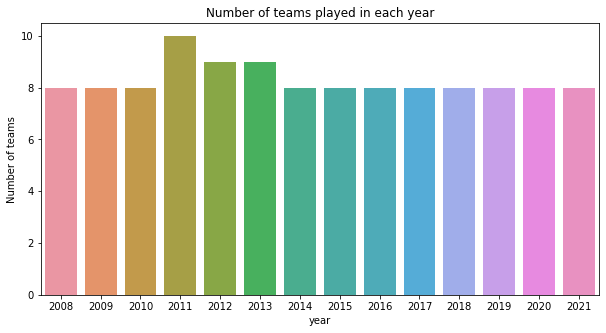

In [49]:
# number of teams played in each year
teams = ipl_matches.groupby(['year','batting_team']).count()
teams = teams.reset_index()
teams = teams[['year','batting_team']]
# number of teams played in each year
teams = teams.groupby(['year']).batting_team.count()
# resetting the index
teams = teams.reset_index()
# renaming the columns
teams.columns = ['year','Number of teams']
# setting the size of the plot
plt.figure(figsize = (10,5))
# lets plot with seaborn
sns.barplot(data = teams,x = 'year',y = 'Number of teams')
# adding title to the plolt
plt.title("Number of teams played in each year")

Text(0.5, 1.0, 'Number of matches played in each year')

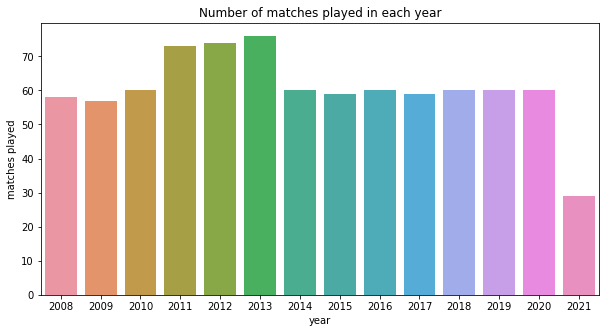

In [50]:
# number of matches played in each year
ipl_matches.year = ipl_matches.year.astype(int)
matches = ipl_matches.groupby(['year','match_id']).count()
matches = matches.reset_index()
matches = matches[['year','match_id']]
# count number of matches played in each year
matches = matches.groupby(['year']).match_id.count()
# resetting the index
matches = matches.reset_index()
# renaming the columns
matches.columns = ['year','matches played']
plt.figure(figsize = (10,5))
# plot
sns.barplot(data = matches,x = 'year',y = 'matches played')
# adding title to the plot
plt.title("Number of matches played in each year")

In [51]:
ipl_matches.batting_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Deccan Chargers', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Mumbai Indians', 'Rajasthan Royals',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings'],
      dtype=object)

In [52]:
# Convert Delhi Daredevils to Dalhi Capitals 
ipl_matches.loc[ipl_matches.batting_team == "Delhi Daredevils",'batting_team'] = 'Delhi Capitals'
ipl_matches.loc[ipl_matches.bowling_team == "Delhi Daredevils",'bowling_team'] = 'Delhi Capitals'
# Convert Kings XI Punjab to Punjab Kings
ipl_matches.loc[ipl_matches.batting_team == "Kings XI Punjab",'batting_team'] = 'Punjab Kings'
ipl_matches.loc[ipl_matches.bowling_team == "Kings XI Punjab",'bowling_team'] = 'Punjab Kings'

In [53]:
# keep only consistent teams
# there are only 8 teams playing in 2021 ipl remove in-consistent teams
consistent_teams = ['Kolkata Knight Riders', 'Royal Challengers Bangalore',
                      'Chennai Super Kings', 'Punjab Kings', 'Rajasthan Royals',
                      'Mumbai Indians','Sunrisers Hyderabad','Delhi Capitals']

# Delhi daredevils have changed to delhi capitals
ipl_matches = ipl_matches[(ipl_matches['batting_team'].isin(consistent_teams))&
                    (ipl_matches['bowling_team'].isin(consistent_teams))]

# check if the rows are decreased
ipl_matches.shape

(156771, 21)

In [54]:
ipl_matches.batting_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Punjab Kings', 'Delhi Capitals', 'Chennai Super Kings',
       'Mumbai Indians', 'Rajasthan Royals', 'Sunrisers Hyderabad'],
      dtype=object)

In [55]:
ipl_matches.innings.unique()

array([1, 2, 3, 4, 5, 6])

In [56]:
# as we are predicting first innings score we will remove all the other innings 
# except one
ipl_matches = ipl_matches[ipl_matches.innings == 1]

In [57]:
# top 5 maximum scores of first innings
top_5 = ipl_matches
top_5 = top_5.groupby(['match_id','batting_team','bowling_team']).Total_runs.max()

top_5 = top_5.reset_index()

high_5 = top_5.sort_values('Total_runs',ascending = False)[:5]
low_5 = top_5.sort_values('Total_runs')[:5]

In [58]:
high_5

,match_id,batting_team,bowling_team,Total_runs
109,419137,Chennai Super Kings,Rajasthan Royals,246
494,1136604,Kolkata Knight Riders,Punjab Kings,245
1,335983,Chennai Super Kings,Punjab Kings,240
373,829795,Royal Challengers Bangalore,Mumbai Indians,235
557,1178422,Kolkata Knight Riders,Mumbai Indians,232


In [59]:
low_5

,match_id,batting_team,bowling_team,Total_runs
559,1178424,Royal Challengers Bangalore,Rajasthan Royals,62
437,1082626,Delhi Capitals,Punjab Kings,67
29,336021,Kolkata Knight Riders,Mumbai Indians,67
511,1175356,Royal Challengers Bangalore,Chennai Super Kings,70
282,729305,Royal Challengers Bangalore,Rajasthan Royals,70


In [60]:
print(min(ipl_matches.Total_runs))
print(max(ipl_matches.Total_runs))

62
246


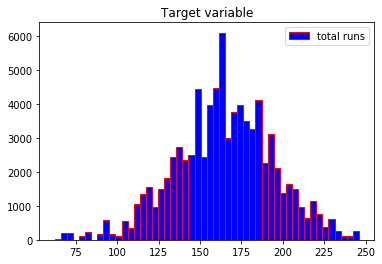

In [61]:
plt.hist(ipl_matches.Total_runs, 
         facecolor='blue', 
         edgecolor='red', 
         bins=50,
        label = 'total runs')
plt.title("Target variable")
plt.legend()
plt.show()

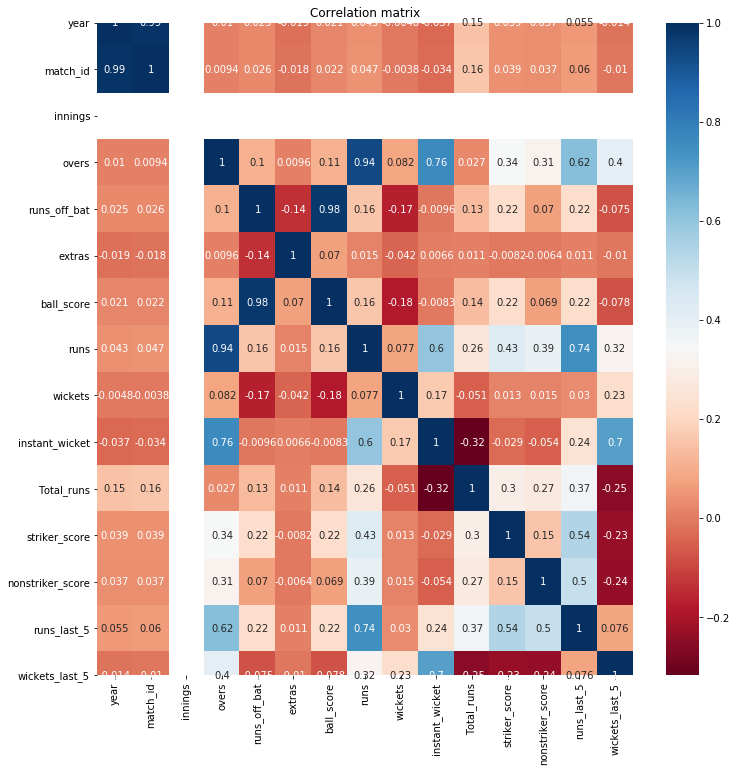

In [62]:
corrmatrix = ipl_matches.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corrmatrix, annot = True,cmap='RdBu')
plt.title("Correlation matrix")
plt.show()

In [63]:
# unwanted columns
unwanted_columns = ['innings','extras','match_id','teams','runs_off_bat',
                    'ball_score','wickets']
ipl_matches.drop(labels=unwanted_columns, axis=1, inplace=True)

In [64]:
# Removing the first 6 overs data in every match, as we need to 
# predict the score after 6 overs
ipl_matches = ipl_matches[ipl_matches['overs']>=6.0]

In [65]:
ipl_matches

,year,overs,batting_team,bowling_team,striker,non_striker,bowler,runs,instant_wicket,Total_runs,striker_score,nonstriker_score,runs_last_5,wickets_last_5
38,2008,6.1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,RT Ponting,AA Noffke,62,1,222,42,0,55,1
39,2008,6.2,Kolkata Knight Riders,Royal Challengers Bangalore,RT Ponting,BB McCullum,AA Noffke,63,1,222,1,42,52,1
40,2008,6.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,RT Ponting,AA Noffke,64,1,222,43,1,47,1
41,2008,6.4,Kolkata Knight Riders,Royal Challengers Bangalore,RT Ponting,BB McCullum,AA Noffke,66,1,222,3,43,45,1
42,2008,6.5,Kolkata Knight Riders,Royal Challengers Bangalore,RT Ponting,BB McCullum,AA Noffke,67,1,222,4,43,46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200532,2021,19.2,Rajasthan Royals,Sunrisers Hyderabad,DA Miller,R Parag,V Shankar,210,3,220,0,12,64,2
200533,2021,19.3,Rajasthan Royals,Sunrisers Hyderabad,DA Miller,R Parag,V Shankar,211,3,220,1,12,61,2
200534,2021,19.4,Rajasthan Royals,Sunrisers Hyderabad,R Parag,DA Miller,V Shankar,213,3,220,14,1,62,2
200535,2021,19.5,Rajasthan Royals,Sunrisers Hyderabad,R Parag,DA Miller,V Shankar,214,3,220,15,1,59,2


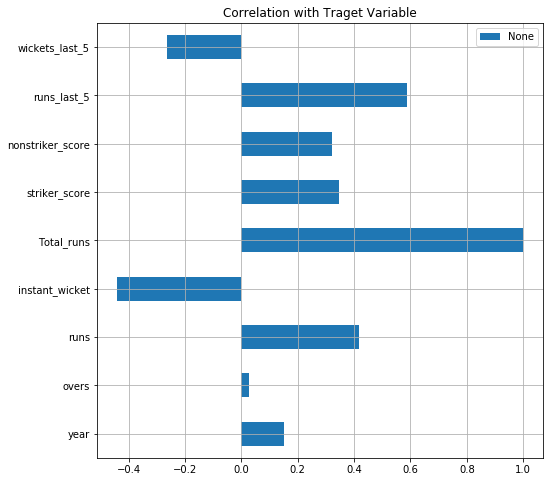

In [66]:
ipl_matches.corrwith(ipl_matches['Total_runs']).plot(kind='barh',
                                             figsize=[8,8], 
                                             legend=True,grid=True)
plt.title("Correlation with Traget Variable")
plt.show()

## Data pre-processing

To use a particular model and predict the outcome, we need to convert all the categorical data into numerical data. <br>
Converting the categorical features using **OneHot Encoding method** <br>

In [67]:
# Converting categorical features batting_team and bowling_team
# to numerical features using OneHotEncoding method
ipl_matches = pd.get_dummies(data=ipl_matches,columns=['batting_team', 'bowling_team'])

ipl_matches.head()

,year,overs,striker,non_striker,bowler,runs,instant_wicket,Total_runs,striker_score,nonstriker_score,...,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Capitals,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Punjab Kings,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad
38,2008,6.1,BB McCullum,RT Ponting,AA Noffke,62,1,222,42,0,...,0,0,0,0,0,0,0,0,1,0
39,2008,6.2,RT Ponting,BB McCullum,AA Noffke,63,1,222,1,42,...,0,0,0,0,0,0,0,0,1,0
40,2008,6.3,BB McCullum,RT Ponting,AA Noffke,64,1,222,43,1,...,0,0,0,0,0,0,0,0,1,0
41,2008,6.4,RT Ponting,BB McCullum,AA Noffke,66,1,222,3,43,...,0,0,0,0,0,0,0,0,1,0
42,2008,6.5,RT Ponting,BB McCullum,AA Noffke,67,1,222,4,43,...,0,0,0,0,0,0,0,0,1,0


In [68]:
ipl_matches

,year,overs,striker,non_striker,bowler,runs,instant_wicket,Total_runs,striker_score,nonstriker_score,...,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Capitals,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Punjab Kings,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad
38,2008,6.1,BB McCullum,RT Ponting,AA Noffke,62,1,222,42,0,...,0,0,0,0,0,0,0,0,1,0
39,2008,6.2,RT Ponting,BB McCullum,AA Noffke,63,1,222,1,42,...,0,0,0,0,0,0,0,0,1,0
40,2008,6.3,BB McCullum,RT Ponting,AA Noffke,64,1,222,43,1,...,0,0,0,0,0,0,0,0,1,0
41,2008,6.4,RT Ponting,BB McCullum,AA Noffke,66,1,222,3,43,...,0,0,0,0,0,0,0,0,1,0
42,2008,6.5,RT Ponting,BB McCullum,AA Noffke,67,1,222,4,43,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200532,2021,19.2,DA Miller,R Parag,V Shankar,210,3,220,0,12,...,0,0,0,0,0,0,0,0,0,1
200533,2021,19.3,DA Miller,R Parag,V Shankar,211,3,220,1,12,...,0,0,0,0,0,0,0,0,0,1
200534,2021,19.4,R Parag,DA Miller,V Shankar,213,3,220,14,1,...,0,0,0,0,0,0,0,0,0,1
200535,2021,19.5,R Parag,DA Miller,V Shankar,214,3,220,15,1,...,0,0,0,0,0,0,0,0,0,1


In [69]:
ipl_matches.columns

Index(['year', 'overs', 'striker', 'non_striker', 'bowler', 'runs',
       'instant_wicket', 'Total_runs', 'striker_score', 'nonstriker_score',
       'runs_last_5', 'wickets_last_5', 'batting_team_Chennai Super Kings',
       'batting_team_Delhi Capitals', 'batting_team_Kolkata Knight Riders',
       'batting_team_Mumbai Indians', 'batting_team_Punjab Kings',
       'batting_team_Rajasthan Royals',
       'batting_team_Royal Challengers Bangalore',
       'batting_team_Sunrisers Hyderabad', 'bowling_team_Chennai Super Kings',
       'bowling_team_Delhi Capitals', 'bowling_team_Kolkata Knight Riders',
       'bowling_team_Mumbai Indians', 'bowling_team_Punjab Kings',
       'bowling_team_Rajasthan Royals',
       'bowling_team_Royal Challengers Bangalore',
       'bowling_team_Sunrisers Hyderabad'],
      dtype='object')

In [70]:
ipl_matches.to_csv("ipl_matches.csv",header=True, index=False)

### 4 Splitting the data into training and test sets

In [71]:
X = ipl_matches.iloc[:,[1,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,
                      21,22,23,24,25,26,27]].values #Input features
y = ipl_matches.iloc[:, 7].values #output

In [72]:
ipl_matches

,year,overs,striker,non_striker,bowler,runs,instant_wicket,Total_runs,striker_score,nonstriker_score,...,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Capitals,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Punjab Kings,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad
38,2008,6.1,BB McCullum,RT Ponting,AA Noffke,62,1,222,42,0,...,0,0,0,0,0,0,0,0,1,0
39,2008,6.2,RT Ponting,BB McCullum,AA Noffke,63,1,222,1,42,...,0,0,0,0,0,0,0,0,1,0
40,2008,6.3,BB McCullum,RT Ponting,AA Noffke,64,1,222,43,1,...,0,0,0,0,0,0,0,0,1,0
41,2008,6.4,RT Ponting,BB McCullum,AA Noffke,66,1,222,3,43,...,0,0,0,0,0,0,0,0,1,0
42,2008,6.5,RT Ponting,BB McCullum,AA Noffke,67,1,222,4,43,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200532,2021,19.2,DA Miller,R Parag,V Shankar,210,3,220,0,12,...,0,0,0,0,0,0,0,0,0,1
200533,2021,19.3,DA Miller,R Parag,V Shankar,211,3,220,1,12,...,0,0,0,0,0,0,0,0,0,1
200534,2021,19.4,R Parag,DA Miller,V Shankar,213,3,220,14,1,...,0,0,0,0,0,0,0,0,0,1
200535,2021,19.5,R Parag,DA Miller,V Shankar,214,3,220,15,1,...,0,0,0,0,0,0,0,0,0,1


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state = 0)

## Model Selection

In [74]:
from sklearn.metrics import mean_squared_error

In [75]:
# Build some models and check them against training data using MAE, RMSE and R2

params = {'n_estimators': 1000,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 1,
          'loss': 'ls'}
def rmsle(real,predicted):
    sum=0.0
    for x in range(len(predicted)):
        p = np.log(predicted[x]+1)
        r = np.log(real[x]+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted))**0.5

models = [LinearRegression(), RandomForestRegressor(),Lasso(),Ridge(),
         AdaBoostRegressor(random_state=0, n_estimators=1000),
          GradientBoostingRegressor(**params),XGBRegressor(booster='gbtree')]
for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_train)
    print(type(model).__name__)
    a = mean_absolute_error(y_train, predictions)
    b = mean_squared_error(y_train, predictions)
    c = sqrt(mean_squared_error(y_train, predictions))
    e = r2_score(y_train, predictions)
    f = 1 - (1-e)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
    
    print('   MAE',a)
    print('   MSE',b)
    print('   RMSE',c)
    print('   R2',e)
    print('   adj R2',f)

LinearRegression
   MAE 12.881271117110803
   MSE 299.26456071503543
   RMSE 17.29926474492588
   R2 0.66072958607518
   adj R2 0.6605449818755047
RandomForestRegressor
   MAE 2.1977356126164467
   MSE 11.700363387241689
   RMSE 3.4205793935007107
   R2 0.9867355255163668
   adj R2 0.9867283080355737
Lasso
   MAE 12.96591975872881
   MSE 306.1099030779212
   RMSE 17.495996772916975
   R2 0.6529691545313834
   adj R2 0.6527803277169576
Ridge
   MAE 12.881260799838035
   MSE 299.2645609473552
   RMSE 17.29926475164061
   R2 0.6607295858118034
   adj R2 0.6605449816119848
AdaBoostRegressor
   MAE 16.192466892711085
   MSE 419.713968574995
   RMSE 20.486921891172305
   R2 0.5241784342648584
   adj R2 0.5239195296986907
GradientBoostingRegressor
   MAE 5.287432307009906
   MSE 51.703826932331154
   RMSE 7.190537318749633
   R2 0.9413843766768875
   adj R2 0.9413524826779182
[21:01:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XG

In [76]:
# Build some models and check them against testing data using MAE, RMSE and R2

params = {'n_estimators': 1000,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 1,
          'loss': 'ls'}
models = [LinearRegression(), RandomForestRegressor(),Lasso(),Ridge(),
         AdaBoostRegressor(random_state=0, n_estimators=1000),
          GradientBoostingRegressor(**params),XGBRegressor(booster='gbtree')]
for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(type(model).__name__)
    a = mean_absolute_error(y_test, predictions)
    b = mean_squared_error(y_test, predictions)
    c = sqrt(mean_squared_error(y_test, predictions))
    e = r2_score(y_test, predictions)
    f = 1 - (1-e)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    
    print('   MAE',a)
    print('   MSE',b)
    print('   RMSE',c)
    print('   R2',e)
    print('   adj R2',f)

LinearRegression
   MAE 13.15527885890891
   MSE 308.2799106521558
   RMSE 17.557901658574007
   R2 0.6590420740072098
   adj R2 0.6584848740428902
RandomForestRegressor
   MAE 5.901360476663357
   MSE 82.10921727904667
   RMSE 9.06141364683495
   R2 0.9091871138501014
   adj R2 0.9090387056945346
Lasso
   MAE 13.216969260561873
   MSE 314.60140034332005
   RMSE 17.737006521488343
   R2 0.6520504993381873
   adj R2 0.6514818736088124
Ridge
   MAE 13.155267108349722
   MSE 308.2798163809289
   RMSE 17.557898973992558
   R2 0.6590421782712923
   adj R2 0.658484978477363
AdaBoostRegressor
   MAE 16.411409564742186
   MSE 429.4290894939381
   RMSE 20.722670906375416
   R2 0.5250509467026747
   adj R2 0.5242747758752029
GradientBoostingRegressor
   MAE 8.989907653381106
   MSE 158.04910626910313
   RMSE 12.571758280729993
   R2 0.8251975116882283
   adj R2 0.8249118461183
[21:04:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBR

In [78]:
lin = LinearRegression()
lin.fit(X_train,y_train)
y_pred = lin.predict(X_test)
r2 = r2_score(y_test, y_pred)
y_pred
lin_residuals = y_test - y_pred

In [79]:
lin.coef_

array([-6.71611068,  0.97847196, -4.52417615, -0.0146599 , -0.02273519,
        0.01183564, -1.19421947,  1.25114643, -1.29906218, -0.09478606,
        2.24427543, -0.16674881, -3.02472916,  3.01623233, -1.92632799,
       -0.37597558,  1.29827202, -1.8668873 , -0.21554438,  1.39621098,
        1.36484943,  0.68060401, -2.28152918])

In [80]:
lin.intercept_

168.195612890427

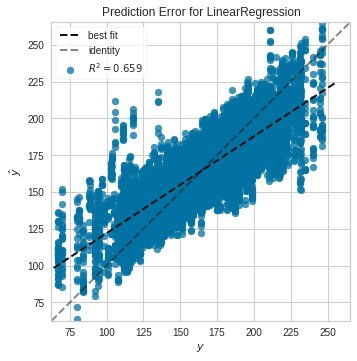

In [81]:
from yellowbrick.regressor import PredictionError
model = lin
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)
plt.savefig("save.png")
visualizer.show() 
plt.close()

#### comparing actual scores and predicted scores

In [82]:
# comparing actual values and predicted values
compare = pd.DataFrame({"actual score":y_test,"predicted score":y_pred})

compare.describe()

,actual score,predicted score
count,14098.000000,14098.000000
mean,164.321748,164.312396
std,30.070290,24.339098
min,67.000000,63.556069
25%,146.000000,148.755147
50%,164.000000,164.297983
75%,185.000000,178.677073
max,246.000000,264.547931


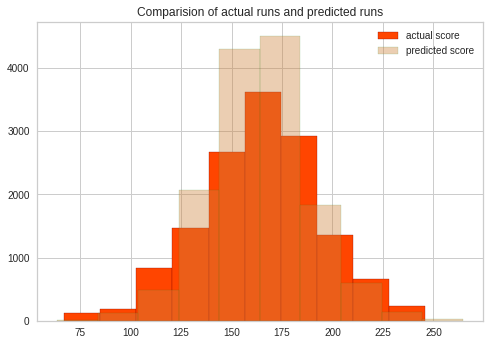

In [83]:
plt.hist(y_test, 
         facecolor='orangered', 
         edgecolor='maroon', 
         bins=10,
        label = 'actual score')

plt.hist(y_pred, 
         facecolor='peru', 
         edgecolor='green', 
         bins=10,
         label = 'predicted score',
         alpha = 0.4)

plt.title("Comparision of actual runs and predicted runs")
plt.legend()
plt.show()

## Model Validation

#### Summary Statistics of Residuals

In [84]:
actuals = y_test
predictions = y_pred

In [85]:
# calculate residuals
residuals = y_test - y_pred
residuals = DataFrame(residuals)
residuals.columns = ['residuals']
# absolute values of residuals
residuals['abs_residuals'] = abs(residuals)

residuals.describe()

,residuals,abs_residuals
count,14098.000000,14098.000000
mean,0.009352,13.155279
std,17.558522,11.628764
min,-105.833055,0.001282
25%,-10.065743,4.876798
50%,-0.193749,10.187388
75%,10.292444,17.858555
max,80.530263,105.833055


Residuals plot to check the performance of the model

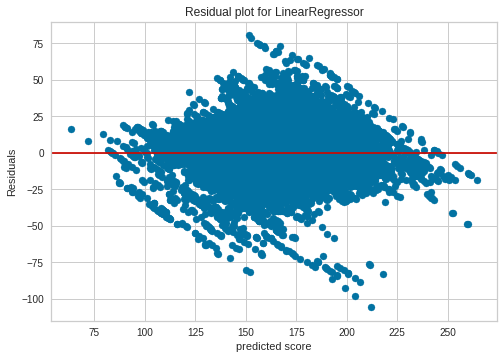

In [86]:
residuals = y_test - y_pred
plt.scatter(y_pred,residuals)
plt.title("Residual plot for LinearRegressor")
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("predicted score")
plt.ylabel("Residuals")
plt.show()

guassian distribution

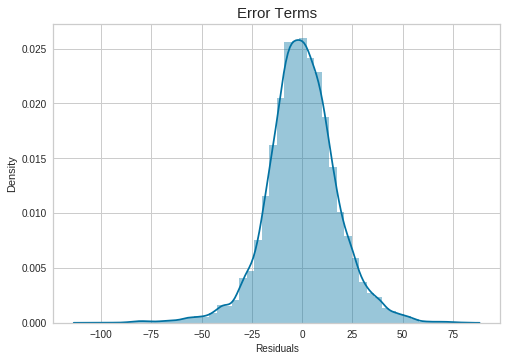

In [87]:
residuals = y_test - y_pred 

sns.distplot(residuals, bins = 50) 
plt.title('Error Terms', fontsize=15)           
plt.xlabel('Residuals', fontsize = 10)     
plt.savefig("save.png")
plt.show()
plt.close()

### Prediction Interval

In [88]:
# estimate stdev of y_pred
sum_errs = sum((y_test - y_pred)**2)
stdev = sqrt(1/(len(y_test)-2) * sum_errs)

accuracy = round(r2,2)
alpha = 1-accuracy
n_sided = 2 # 2-sided test
z_score = stats.norm.ppf(1-alpha/n_sided)

interval = stdev * z_score
interval

16.75432814171355

### Testing with custome input

In [89]:
def predict_final_score(batting_team,bowling_team,overs,
                         runs,instant_wicket,striker_score,nonstriker_score,
                         runs_last_5,wickets_last_5):
    temp = list()
    batting_team = str(batting_team)
    
    if batting_team == 'CSK':
        temp = temp + [1,0,0,0,0,0,0,0]
    elif batting_team == 'DC':
        temp = temp + [0,1,0,0,0,0,0,0]
    elif batting_team == 'KXIP':
        temp = temp + [0,0,1,0,0,0,0,0]
    elif batting_team == 'KKR':
        temp = temp + [0,0,0,1,0,0,0,0]
    elif batting_team == 'MI':
        temp = temp + [0,0,0,0,1,0,0,0]
    elif batting_team == 'RR':
        temp = temp + [0,0,0,0,0,1,0,0]
    elif batting_team == 'RCB':
        temp = temp + [0,0,0,0,0,0,1,0]
    elif batting_team == 'SRH':
        temp = temp + [0,0,0,0,0,0,0,1]
    
    bowling_team = str(bowling_team)
    
    if bowling_team == 'CSK':
        temp = temp + [1,0,0,0,0,0,0,0]
    elif bowling_team == 'DC':
        temp = temp + [0,1,0,0,0,0,0,0]
    elif bowling_team == 'KXIP':
        temp = temp + [0,0,1,0,0,0,0,0]
    elif bowling_team == 'KKR':
        temp = temp + [0,0,0,1,0,0,0,0]
    elif bowling_team == 'MI':
        temp = temp + [0,0,0,0,1,0,0,0]
    elif bowling_team == 'RR':
        temp = temp + [0,0,0,0,0,1,0,0]
    elif bowling_team == 'RCB':
        temp = temp + [0,0,0,0,0,0,1,0]
    elif bowling_team == 'SRH':
        temp = temp + [0,0,0,0,0,0,0,1]
    
    overs = float(overs)
    
    striker_score = int(striker_score)
    nonstriker_score = int(nonstriker_score)
    
    runs = int(runs)
    instant_wicket = int(instant_wicket)
    runs_last_5 = int(runs_last_5)
    wickets_last_5 = int(wickets_last_5)
    
    sample_input = [overs,runs,instant_wicket,striker_score,nonstriker_score,
                    runs_last_5,wickets_last_5] + temp

    score = lin.predict(np.array([sample_input]))
    #return np.array([sample_input])
    return(print('The predicted score is between' ,round(score[0]-interval),"and",
                round(score[0]+interval)))

**This is an example, you can take any value you want** <br>
batting team name: RCB <br>
bowling team name: MI <br>
overs: 8.0 <br>
who is on strike: V Kohli <br>
who is on non_strike: AB de Villiers <br>
bowler: JJ Bumrah <br>
striker score at that instant: 20 <br>
non striker score at that instant: 30 <br>
score at that instant: 60 <br>
number of wickets at that instant: 2 <br>
score in last five overs: 40 <br>
number of wickets lost in last five overs: 1

In [90]:
predict_final_score('RCB','MI',7.0,60,2,20,30,40,1)

The predicted score is between 157.0 and 190.0


#### Prediction 1
**year : 2021** <br>
**match number : 1**<br>
batting team name: KKR <br>
bowling team name: RR <br>
overs: 9.3 <br>
who is on strike: SP Narine <br>
who is on non_strike: RA Tripathi <br>
bowler: JD Unadkat <br>
score at that instant: 53 <br>
number of wickets at that instant: 2 <br>
striker score at that instant: 6 <br>
non striker score at that instant: 12 <br>
score in last five overs: 32 <br>
number of wickets lost in last five overs: 2 <br>
**Total score : 133**

In [95]:
predict_final_score('KKR','RR',9.3,53,2,6,12,32,2)

The predicted score is between 133.0 and 167.0


#### Prediction 2
**year : 2021** <br>
**match number : 2**<br>
batting team name: DC <br>
bowling team name: SRH <br>
overs: 8.4 <br>
who is on strike: PP Shaw <br>
who is on non_strike: S Dhawan <br>
bowler: Rashid Khan <br>
score at that instant: 72 <br>
number of wickets at that instant: 0 <br>
striker score at that instant: 44 <br>
non striker score at that instant: 26 <br>
score in last five overs: 34 <br>
number of wickets lost in last five overs: 0 <br>
**Total score : 159**

In [96]:
predict_final_score('DC','SRH',8.4,72,0,44,26,34,0)

The predicted score is between 161.0 and 195.0


#### Prediction 3
**year : 2021** <br>
**match number : 3**<br>
batting team name: CSK <br>
bowling team name: RCB <br>
overs: 11.4 <br>
who is on strike: SK Raina <br>
who is on non_strike: F du Plessis <br>
bowler: Washington Sundar <br>
score at that instant: 97 <br>
number of wickets at that instant: 1 <br>
striker score at that instant: 17 <br>
non striker score at that instant: 43 <br>
score in last five overs: 43 <br>
number of wickets lost in last five overs: 1 <br>
**Total score : 191**

In [97]:
predict_final_score('CSK','RCB',11.4,97,1,17,43,43,1)

The predicted score is between 165.0 and 199.0


#### Prediction 4
**year : 2021** <br>
batting team name: MI <br>
bowling team name: RCB <br>
overs: 7.7 <br>
who is on strike: CA Lynn <br>
who is on non_strike: SA Yadav <br>
bowler: HV Patel <br>
score at that instant: 70 <br>
number of wickets at that instant: 1 <br>
striker score at that instant: 33 <br>
non striker score at that instant: 17 <br>
score in last five overs: 58 <br>
number of wickets lost in last five overs: 1 <br>
**Total score : 159**

In [98]:
predict_final_score('MI','RCB',7.7,70,1,33,17,58,1)

The predicted score is between 163.0 and 196.0
